# Кейс 1

В системе зарегистрированы сайт и рекламная кампания с непостоянными показателями количества трафика (impressions)
Задачи:
1. Нужно оценить как резкое увеличения и количество трафика на сайте влияет на ключевые показатели rewenue/profit/paid.
2. Нужно оценить как резкое увеличения и количество трафика на кампании влияет на ключевые показатели rewenue/profit/paid.
3. Нужно оценить как поступление трафика с данного сайта на кампанию влияет на ключевые показатели кампании rewenue/profit/paid в целом.

3 файла.
1. Почасовая статистика трафика с сайта за 3 месяца.
2. Почасовая статистика трафика на кампанию за 3 месяца.
3. Почасовая статистика трафика с данного сайта на данную кампанию за 3 месяца.

Нужно предложить и обосновать рекомендации.
Возможная рекомендация: предложение наиболее выгодный временной интервал и объемы трафика.



## Предварительная обработка и ознакомление с данными

Загрузим последовательно все датасеты и ознакомимся с содержимым:

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns

from sklearn.linear_model import LinearRegression

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


1) Почасовая статистика трафика с сайта за 3 месяца:

In [3]:
dataFromSite = pd.read_excel('Case 1 statistics for site reporo US iOS wifi.xls')
dataFromSite.Hour = dataFromSite.Hour.apply(pd.to_datetime)

*** No CODEPAGE record, no encoding_override: will use 'ascii'


Посмотрим первые 5 строк:

In [4]:
dataFromSite.head()

,Hour,Requests,Impressions,Clicks,Conversions,Revenue,Payed,Profit,ROI,Conv/Imps,CPM,CPM_P,CTR
0,2016-03-01 00:00:00,68235,63559,0,47,89.83,108.05,-18.23,-20.29,0.07,1.41,1.7,0
1,2016-03-01 01:00:00,67019,62882,0,39,74.76,106.90,-32.14,-43.00,0.06,1.19,1.7,0
2,2016-03-01 02:00:00,50153,46879,0,28,53.55,79.69,-26.14,-48.81,0.06,1.14,1.7,0
3,2016-03-01 03:00:00,20996,26110,0,15,26.79,44.39,-17.60,-65.67,0.06,1.03,1.7,0
4,2016-03-01 04:00:00,9020,8419,0,14,26.70,14.31,12.38,46.39,0.17,3.17,1.7,0


Количество строк (почасовых измерений) и количество столбцов (параметров измерений) в загруженном датасете:

In [5]:
dataFromSite.shape

(2928, 13)

Общая сводка по датасету:

In [6]:
dataFromSite.describe()

,Requests,Impressions,Clicks,Conversions,Revenue,Payed,Profit,ROI,Conv/Imps,CPM,CPM_P,CTR
count,2928.000000,2928.000000,2928.0,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2928.0
mean,21290.585724,20297.427254,0.0,24.331967,45.229532,34.889693,10.339802,-38.545266,70.747350,1275.760615,1.700287,0.0
std,19938.084209,19116.200687,0.0,22.154698,41.380835,32.934527,34.496719,1276.955027,157.634842,2814.606970,0.161046,0.0
min,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,-96.410000,-61583.550000,0.000000,0.000000,0.000000,0.0
25%,14.000000,7.000000,0.0,7.000000,13.735000,0.010000,-9.972500,-26.967500,0.060000,1.180000,1.700000,0.0
50%,20528.500000,19401.500000,0.0,18.000000,32.840000,33.325000,6.590000,28.810000,0.130000,2.380000,1.700000,0.0
75%,36763.000000,34925.500000,0.0,36.000000,65.677500,60.130000,24.955000,99.900000,83.330000,1512.617500,1.700000,0.0
max,89785.000000,86811.000000,0.0,161.000000,298.660000,151.050000,241.870000,100.000000,1900.000000,33800.000000,1.850000,0.0


2) Почасовая статистика трафика на кампанию за 3 месяца:

In [7]:
dataFromCampaign = pd.read_excel('Case 1 statistics for campaign Crush iPhone wifi_US.xls')
dataFromCampaign.Hour = dataFromCampaign.Hour.apply(pd.to_datetime)

*** No CODEPAGE record, no encoding_override: will use 'ascii'


Посмотрим первые 5 строк:

In [8]:
dataFromCampaign.head()

,Hour,Requests,Impressions,Clicks,Conversions,Revenue,Payed,Profit,ROI,Conv/Imps,CPM,CPM_P,CTR
0,2016-03-01 00:00:00,100503,129153,0,85,161.5,233.11,-71.61,-44.34,0.07,1.25,1.80,0
1,2016-03-01 01:00:00,73790,109935,0,70,133.0,200.53,-67.53,-50.78,0.06,1.21,1.82,0
2,2016-03-01 02:00:00,52950,78497,0,51,96.9,142.92,-46.02,-47.49,0.06,1.23,1.82,0
3,2016-03-01 03:00:00,22556,31361,0,25,47.5,54.58,-7.08,-14.90,0.08,1.51,1.74,0
4,2016-03-01 04:00:00,9358,8775,0,21,39.9,15.30,24.60,61.65,0.24,4.55,1.74,0


Количество строк (почасовых измерений) и количество столбцов (параметров измерений) в загруженном датасете:

In [9]:
dataFromCampaign.shape

(2540, 13)

Общая сводка по датасету:

In [10]:
dataFromCampaign.describe()

,Requests,Impressions,Clicks,Conversions,Revenue,Payed,Profit,ROI,Conv/Imps,CPM,CPM_P,CTR
count,2540.000000,2540.000000,2540.0,2540.000000,2540.000000,2540.000000,2540.000000,2540.000000,2540.000000,2540.000000,2540.000000,2540.0
mean,4259.565748,5041.848819,0.0,5.169685,10.746016,8.975224,1.770795,2.721409,8.070846,168.647906,2.348594,0.0
std,11242.248004,12004.257320,0.0,10.156434,21.036410,20.834011,15.806578,164.149014,50.718332,1072.800026,1.783919,0.0
min,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,-76.570000,-2804.140000,0.000000,0.000000,0.000000,0.0
25%,3.000000,14.000000,0.0,0.000000,0.000000,0.020000,-0.552500,0.000000,0.000000,0.000000,1.387500,0.0
50%,76.000000,257.500000,0.0,1.000000,2.190000,0.520000,0.000000,0.000000,0.070000,1.530000,1.880000,0.0
75%,765.750000,2242.000000,0.0,5.000000,10.500000,5.795000,4.370000,91.737500,0.730000,15.220000,3.152500,0.0
max,100503.000000,129153.000000,0.0,85.000000,163.800000,233.110000,148.400000,100.000000,1000.000000,21000.000000,8.750000,0.0


3) Почасовая статистика трафика с данного сайта на данную кампанию за 3 месяца:

In [11]:
dataFromSiteInCampaign = pd.read_excel('Case 1 statistics for site-campaing.xls')
dataFromSiteInCampaign.Hour = dataFromSiteInCampaign.Hour.apply(pd.to_datetime)

*** No CODEPAGE record, no encoding_override: will use 'ascii'


Посмотрим первые 5 строк:

In [12]:
dataFromSiteInCampaign.head()

,Hour,Requests,Impressions,Clicks,Conversions,Revenue,Payed,Profit,ROI,Conv/Imps,CPM,CPM_P,CTR
0,2016-03-01 00:00:00,66583,61987,0,47,89.3,105.38,-16.08,-18.00,0.08,1.44,1.7,0
1,2016-03-01 01:00:00,64940,60966,0,37,70.3,103.64,-33.34,-47.43,0.06,1.15,1.7,0
2,2016-03-01 02:00:00,48247,45086,0,28,53.2,76.65,-23.45,-44.07,0.06,1.18,1.7,0
3,2016-03-01 03:00:00,20054,24912,0,14,26.6,42.35,-15.75,-59.21,0.06,1.07,1.7,0
4,2016-03-01 04:00:00,8517,7949,0,14,26.6,13.51,13.09,49.20,0.18,3.35,1.7,0


Количество строк (почасовых измерений) и количество столбцов (параметров измерений) в загруженном датасете:

In [13]:
dataFromSiteInCampaign.shape

(1446, 13)

Общая сводка по датасету:

In [14]:
dataFromSiteInCampaign.describe()

,Requests,Impressions,Clicks,Conversions,Revenue,Payed,Profit,ROI,Conv/Imps,CPM,CPM_P,CTR
count,1446.000000,1446.000000,1446.0,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000,1446.0
mean,7010.932227,6739.023513,0.0,7.056017,14.705055,11.687656,3.017393,4.074488,25.025643,523.688658,1.189882,0.0
std,13853.874159,13371.900585,0.0,11.515131,23.995318,23.295311,19.560570,210.248892,105.676845,2215.850461,0.802101,0.0
min,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,-69.960000,-2394.670000,0.000000,0.000000,0.000000,0.0
25%,0.000000,0.000000,0.0,1.000000,1.940000,0.000000,-0.102500,0.000000,0.000000,0.000000,0.000000,0.0
50%,9.000000,6.000000,0.0,2.500000,5.100000,0.010000,2.100000,72.380000,0.000000,0.000000,1.700000,0.0
75%,7147.250000,6759.750000,0.0,8.000000,16.800000,11.680000,8.400000,100.000000,0.120000,2.577500,1.750000,0.0
max,78880.000000,76409.000000,0.0,74.000000,155.400000,141.360000,132.270000,100.000000,2100.000000,44100.000000,1.850000,0.0


## Визуализация данных

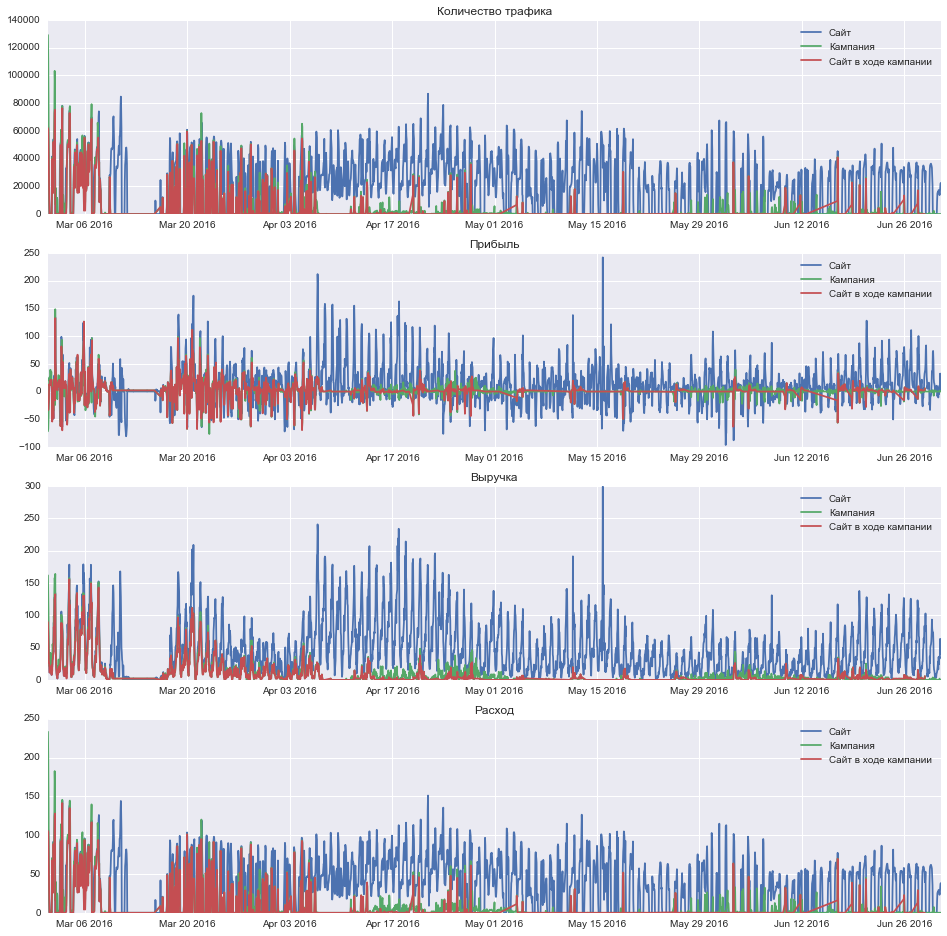

In [15]:
pylab.figure(figsize=(16, 16))

pylab.subplot(4,1,1)
pylab.grid(True)
pylab.plot(dataFromSite.Hour.values, dataFromSite.Impressions.values, label=u"Сайт")
pylab.plot(dataFromCampaign.Hour.values, dataFromCampaign.Impressions.values, label=u"Кампания")
pylab.plot(dataFromSiteInCampaign.Hour.values, dataFromSiteInCampaign.Impressions.values, label=u"Сайт в ходе кампании")
pylab.legend()
pylab.title(u'Количество трафика')
#pylab.xlim('2016-03-01T03:00:00.000000000+0300', '2016-04-01T00:00:00.000000000+0300')

pylab.subplot(4,1,2)
pylab.grid(True)
pylab.plot(dataFromSite.Hour.values, dataFromSite.Profit.values, label=u"Сайт")
pylab.plot(dataFromCampaign.Hour.values, dataFromCampaign.Profit.values, label=u"Кампания")
pylab.plot(dataFromSiteInCampaign.Hour.values, dataFromSiteInCampaign.Profit.values, label=u"Сайт в ходе кампании")
pylab.legend()
pylab.title(u'Прибыль')
#pylab.xlim('2016-03-01T03:00:00.000000000+0300', '2016-04-01T00:00:00.000000000+0300')

pylab.subplot(4,1,3)
pylab.grid(True)
pylab.plot(dataFromSite.Hour.values, dataFromSite.Revenue.values, label=u"Сайт")
pylab.plot(dataFromCampaign.Hour.values, dataFromCampaign.Revenue.values, label=u"Кампания")
pylab.plot(dataFromSiteInCampaign.Hour.values, dataFromSiteInCampaign.Revenue.values, label=u"Сайт в ходе кампании")
pylab.legend()
pylab.title(u'Выручка')
#pylab.xlim('2016-03-01T03:00:00.000000000+0300', '2016-04-01T00:00:00.000000000+0300')

pylab.subplot(4,1,4)
pylab.grid(True)
pylab.plot(dataFromSite.Hour.values, dataFromSite.Payed.values, label=u"Сайт")
pylab.plot(dataFromCampaign.Hour.values, dataFromCampaign.Payed.values, label=u"Кампания")
pylab.plot(dataFromSiteInCampaign.Hour.values, dataFromSiteInCampaign.Payed.values, label=u"Сайт в ходе кампании")
pylab.legend()
pylab.title(u'Расход')
#pylab.xlim('2016-03-01T03:00:00.000000000+0300', '2016-04-01T00:00:00.000000000+0300')


Из графиков, в течение всего периода, получено:    
1) Количество трафика распределено не равномерно.    
Имеется период, в течение которого полностью отсутсвует трафик - выходные дни начиная с 8 марта (включительно) до 15 марта (включительно). Также имеются пики трафика до праздничнх дней (не включительно) и провалы в их течении: 1 мая, 9 мая и 12 июня.   
2) Сайт непостоянно участвует в кампании.   
В период с 1 марта (включительно) до 8 марта (не включительно) и с 15 марта (включительно) до 7 апреля (включительно) сайт активно участвовал в кампании. Далее только эпизодически.   

Рассмотрим подробнее несколько периодов:

* Период с 1 марта по 8 марта:

(736024.0, 736031.875)

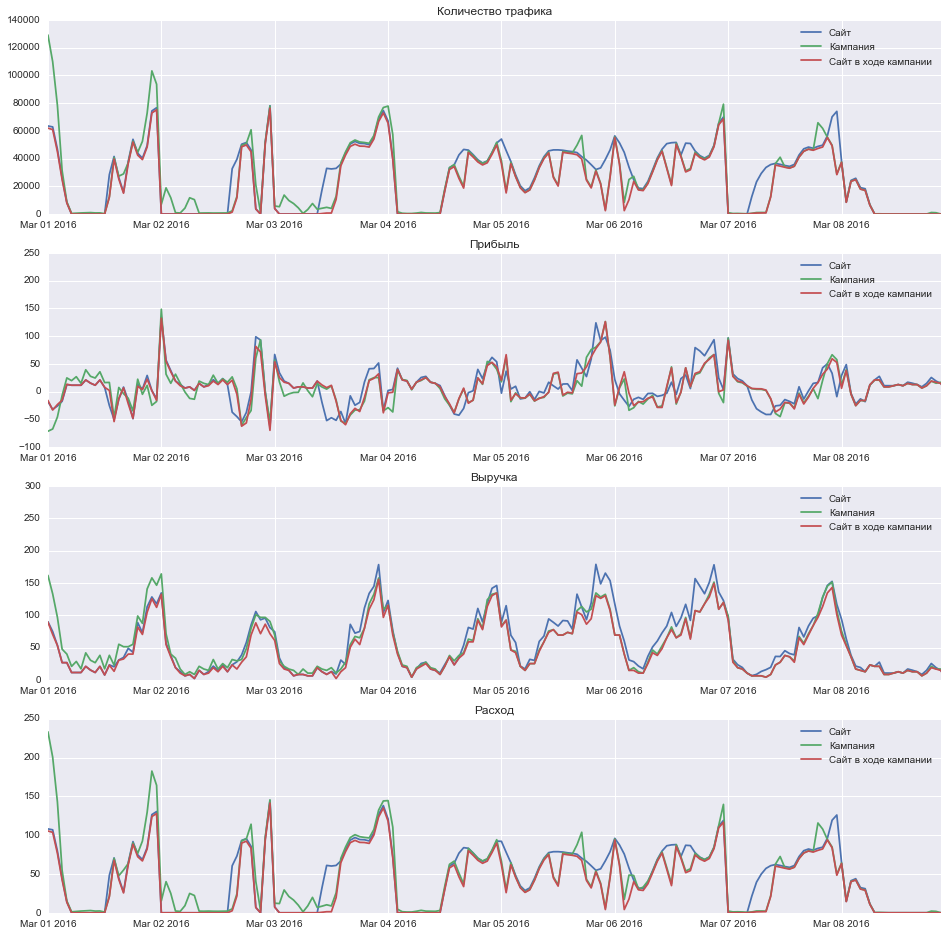

In [16]:
pylab.figure(figsize=(16, 16))

pylab.subplot(4,1,1)
pylab.grid(True)
pylab.plot(dataFromSite.Hour.values, dataFromSite.Impressions.values, label=u"Сайт")
pylab.plot(dataFromCampaign.Hour.values, dataFromCampaign.Impressions.values, label=u"Кампания")
pylab.plot(dataFromSiteInCampaign.Hour.values, dataFromSiteInCampaign.Impressions.values, label=u"Сайт в ходе кампании")
pylab.legend()
pylab.title(u'Количество трафика')
pylab.xlim('2016-03-01T03:00:00.000000000+0300', '2016-03-09T00:00:00.000000000+0300')

pylab.subplot(4,1,2)
pylab.grid(True)
pylab.plot(dataFromSite.Hour.values, dataFromSite.Profit.values, label=u"Сайт")
pylab.plot(dataFromCampaign.Hour.values, dataFromCampaign.Profit.values, label=u"Кампания")
pylab.plot(dataFromSiteInCampaign.Hour.values, dataFromSiteInCampaign.Profit.values, label=u"Сайт в ходе кампании")
pylab.legend()
pylab.title(u'Прибыль')
pylab.xlim('2016-03-01T03:00:00.000000000+0300', '2016-03-09T00:00:00.000000000+0300')

pylab.subplot(4,1,3)
pylab.grid(True)
pylab.plot(dataFromSite.Hour.values, dataFromSite.Revenue.values, label=u"Сайт")
pylab.plot(dataFromCampaign.Hour.values, dataFromCampaign.Revenue.values, label=u"Кампания")
pylab.plot(dataFromSiteInCampaign.Hour.values, dataFromSiteInCampaign.Revenue.values, label=u"Сайт в ходе кампании")
pylab.legend()
pylab.title(u'Выручка')
pylab.xlim('2016-03-01T03:00:00.000000000+0300', '2016-03-09T00:00:00.000000000+0300')

pylab.subplot(4,1,4)
pylab.grid(True)
pylab.plot(dataFromSite.Hour.values, dataFromSite.Payed.values, label=u"Сайт")
pylab.plot(dataFromCampaign.Hour.values, dataFromCampaign.Payed.values, label=u"Кампания")
pylab.plot(dataFromSiteInCampaign.Hour.values, dataFromSiteInCampaign.Payed.values, label=u"Сайт в ходе кампании")
pylab.legend()
pylab.title(u'Расход')
pylab.xlim('2016-03-01T03:00:00.000000000+0300', '2016-03-09T00:00:00.000000000+0300')

* Период с 18 марта по 24 марта:

(736040.0, 736047.875)

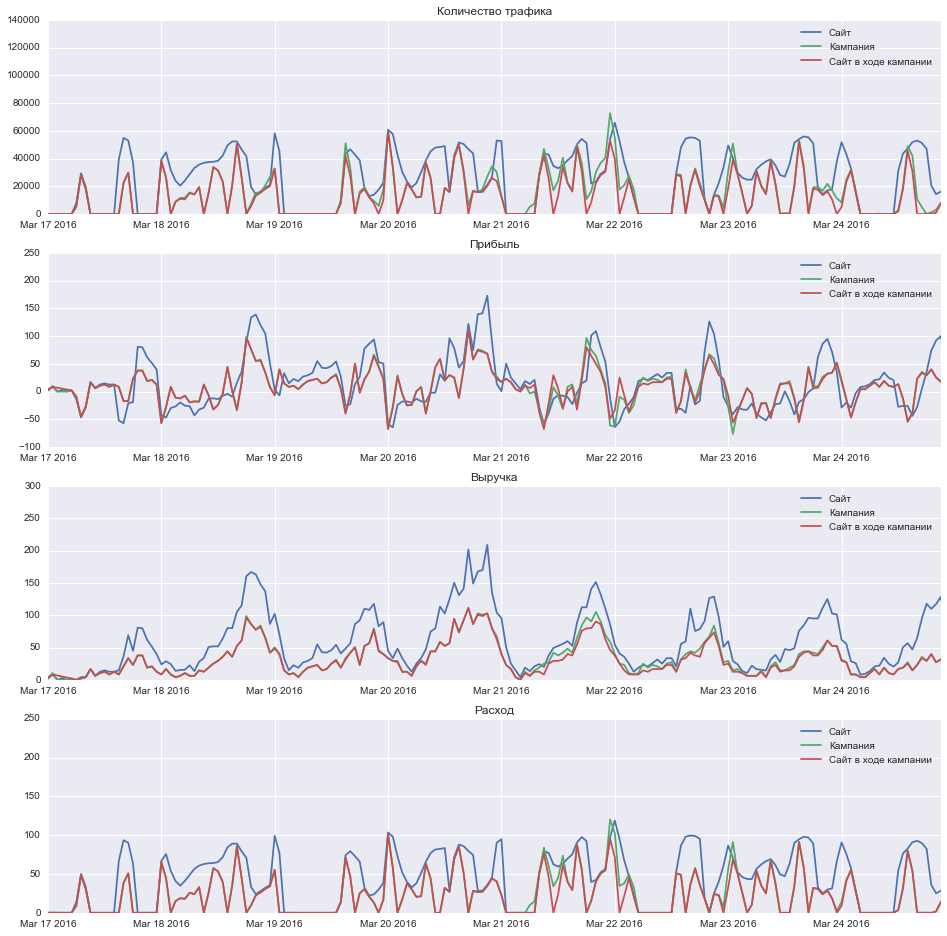

In [17]:
pylab.figure(figsize=(16, 16))

pylab.subplot(4,1,1)
pylab.grid(True)
pylab.plot(dataFromSite.Hour.values, dataFromSite.Impressions.values, label=u"Сайт")
pylab.plot(dataFromCampaign.Hour.values, dataFromCampaign.Impressions.values, label=u"Кампания")
pylab.plot(dataFromSiteInCampaign.Hour.values, dataFromSiteInCampaign.Impressions.values, label=u"Сайт в ходе кампании")
pylab.legend()
pylab.title(u'Количество трафика')
pylab.xlim('2016-03-17T03:00:00.000000000+0300', '2016-03-25T00:00:00.000000000+0300')

pylab.subplot(4,1,2)
pylab.grid(True)
pylab.plot(dataFromSite.Hour.values, dataFromSite.Profit.values, label=u"Сайт")
pylab.plot(dataFromCampaign.Hour.values, dataFromCampaign.Profit.values, label=u"Кампания")
pylab.plot(dataFromSiteInCampaign.Hour.values, dataFromSiteInCampaign.Profit.values, label=u"Сайт в ходе кампании")
pylab.legend()
pylab.title(u'Прибыль')
pylab.xlim('2016-03-17T03:00:00.000000000+0300', '2016-03-25T00:00:00.000000000+0300')

pylab.subplot(4,1,3)
pylab.grid(True)
pylab.plot(dataFromSite.Hour.values, dataFromSite.Revenue.values, label=u"Сайт")
pylab.plot(dataFromCampaign.Hour.values, dataFromCampaign.Revenue.values, label=u"Кампания")
pylab.plot(dataFromSiteInCampaign.Hour.values, dataFromSiteInCampaign.Revenue.values, label=u"Сайт в ходе кампании")
pylab.legend()
pylab.title(u'Выручка')
pylab.xlim('2016-03-17T03:00:00.000000000+0300', '2016-03-25T00:00:00.000000000+0300')

pylab.subplot(4,1,4)
pylab.grid(True)
pylab.plot(dataFromSite.Hour.values, dataFromSite.Payed.values, label=u"Сайт")
pylab.plot(dataFromCampaign.Hour.values, dataFromCampaign.Payed.values, label=u"Кампания")
pylab.plot(dataFromSiteInCampaign.Hour.values, dataFromSiteInCampaign.Payed.values, label=u"Сайт в ходе кампании")
pylab.legend()
pylab.title(u'Расход')
pylab.xlim('2016-03-17T03:00:00.000000000+0300', '2016-03-25T00:00:00.000000000+0300')

* Период с 15 апреля по 23 апреля:

(736069.0, 736076.875)

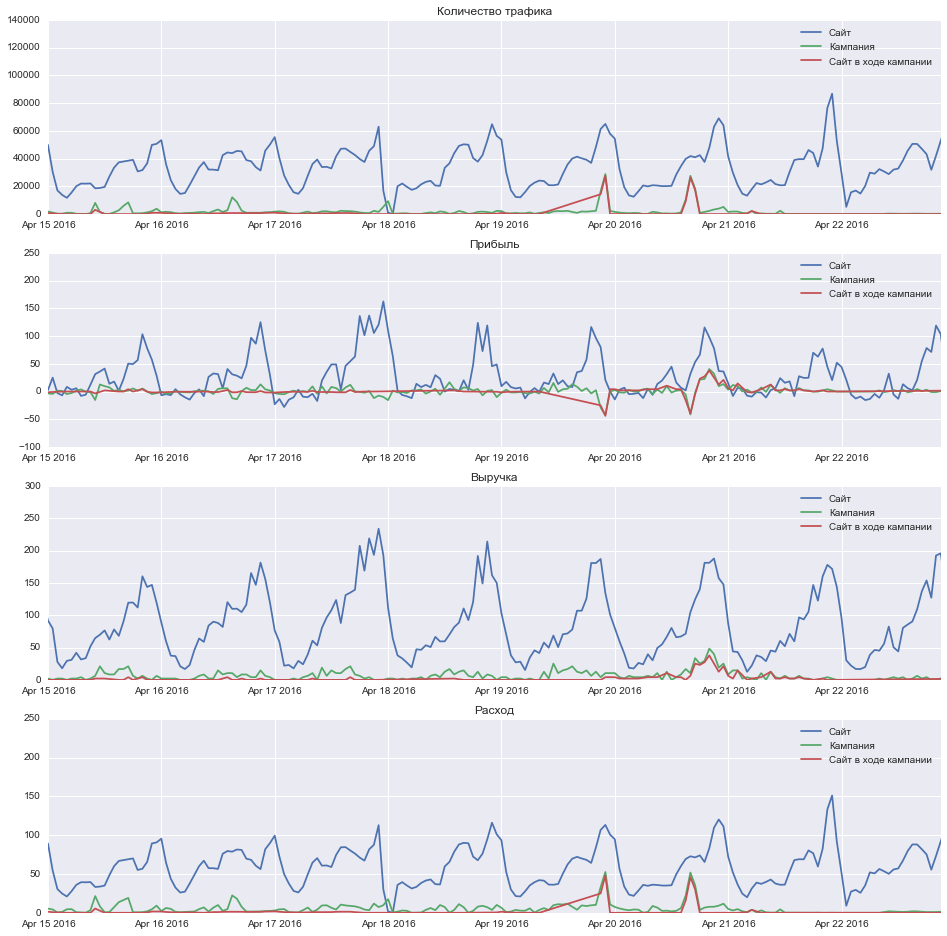

In [18]:
pylab.figure(figsize=(16, 16))

pylab.subplot(4,1,1)
pylab.grid(True)
pylab.plot(dataFromSite.Hour.values, dataFromSite.Impressions.values, label=u"Сайт")
pylab.plot(dataFromCampaign.Hour.values, dataFromCampaign.Impressions.values, label=u"Кампания")
pylab.plot(dataFromSiteInCampaign.Hour.values, dataFromSiteInCampaign.Impressions.values, label=u"Сайт в ходе кампании")
pylab.legend()
pylab.title(u'Количество трафика')
pylab.xlim('2016-04-15T03:00:00.000000000+0300', '2016-04-23T00:00:00.000000000+0300')

pylab.subplot(4,1,2)
pylab.grid(True)
pylab.plot(dataFromSite.Hour.values, dataFromSite.Profit.values, label=u"Сайт")
pylab.plot(dataFromCampaign.Hour.values, dataFromCampaign.Profit.values, label=u"Кампания")
pylab.plot(dataFromSiteInCampaign.Hour.values, dataFromSiteInCampaign.Profit.values, label=u"Сайт в ходе кампании")
pylab.legend()
pylab.title(u'Прибыль')
pylab.xlim('2016-04-15T03:00:00.000000000+0300', '2016-04-23T00:00:00.000000000+0300')

pylab.subplot(4,1,3)
pylab.grid(True)
pylab.plot(dataFromSite.Hour.values, dataFromSite.Revenue.values, label=u"Сайт")
pylab.plot(dataFromCampaign.Hour.values, dataFromCampaign.Revenue.values, label=u"Кампания")
pylab.plot(dataFromSiteInCampaign.Hour.values, dataFromSiteInCampaign.Revenue.values, label=u"Сайт в ходе кампании")
pylab.legend()
pylab.title(u'Выручка')
pylab.xlim('2016-04-15T03:00:00.000000000+0300', '2016-04-23T00:00:00.000000000+0300')

pylab.subplot(4,1,4)
pylab.grid(True)
pylab.plot(dataFromSite.Hour.values, dataFromSite.Payed.values, label=u"Сайт")
pylab.plot(dataFromCampaign.Hour.values, dataFromCampaign.Payed.values, label=u"Кампания")
pylab.plot(dataFromSiteInCampaign.Hour.values, dataFromSiteInCampaign.Payed.values, label=u"Сайт в ходе кампании")
pylab.legend()
pylab.title(u'Расход')
pylab.xlim('2016-04-15T03:00:00.000000000+0300', '2016-04-23T00:00:00.000000000+0300')

#### Выводы из графиков:

1) Трафик (сайт, кампания и сайт в ходе кампании) приносит прибыль, в основном, во второй половине дня (в период с 12.00 до 00.00). Исключение пятница - в период с 18.00 до 00.00.   
2) В праздничные дни трафик (сайт, кампания и сайт в ходе кампании) прибыли не приносит.    
3) Кампания и сайт в ходе кампании после 7 апреля не приносят прибыль. Вероятно это связано с завершением интереса к проблеме WiFi у iPhone.

## Оценка влияния количества трафика сайта на ключевые показатели 

In [19]:
X_Impressions = dataFromSite['Impressions']
y_Profit = dataFromSite[['Profit']]
y_Revenue = dataFromSite[['Revenue']]
y_Payed = dataFromSite[['Payed']]

In [20]:
X_Impressions = X_Impressions.reshape((len(X_Impressions), 1))

In [21]:
regr = LinearRegression()

regr.fit(X_Impressions, y_Profit)
ProfitCoef = regr.coef_[0][0]
ProfitIntercept = regr.intercept_[0]

regr.fit(X_Impressions, y_Revenue)
RevenueCoef = regr.coef_[0][0]
RevenueIntercept = regr.intercept_[0]

regr.fit(X_Impressions, y_Payed)
PayedCoef = regr.coef_[0][0]
PayedIntercept = regr.intercept_[0]

print ""
print 'Зависимость выгоды (Profit) от объема трафика (Impressions):'
print "Profit = {:} + {:}*Impressions".format(ProfitIntercept, ProfitCoef)
print "Объем трафика (Impressions) при нулевой выгоде (Profit) = {:}".format(round(ProfitIntercept/abs(ProfitCoef)))
print ""
print 'Зависимость выручки (Revenue) от объема трафика (Impressions):'
print "Revenue = {:} + {:}*Impressions".format(RevenueIntercept, RevenueCoef)
print ""
print 'Зависимость расходов (Payed) от объема трафика (Impressions)'
print "Payed = {:} + {:}*Impressions".format(PayedIntercept, PayedCoef)


Зависимость выгоды (Profit) от объема трафика (Impressions):
Profit = 19.4958664658 + -0.000451094832789*Impressions
Объем трафика (Impressions) при нулевой выгоде (Profit) = 43219.0

Зависимость выручки (Revenue) от объема трафика (Impressions):
Revenue = 19.4323681307 + 0.0012709573312*Impressions

Зависимость расходов (Payed) от объема трафика (Impressions)
Payed = -0.0634310561321 + 0.00172204699845*Impressions


Построим соответсвующие графики:

(0, 90000)

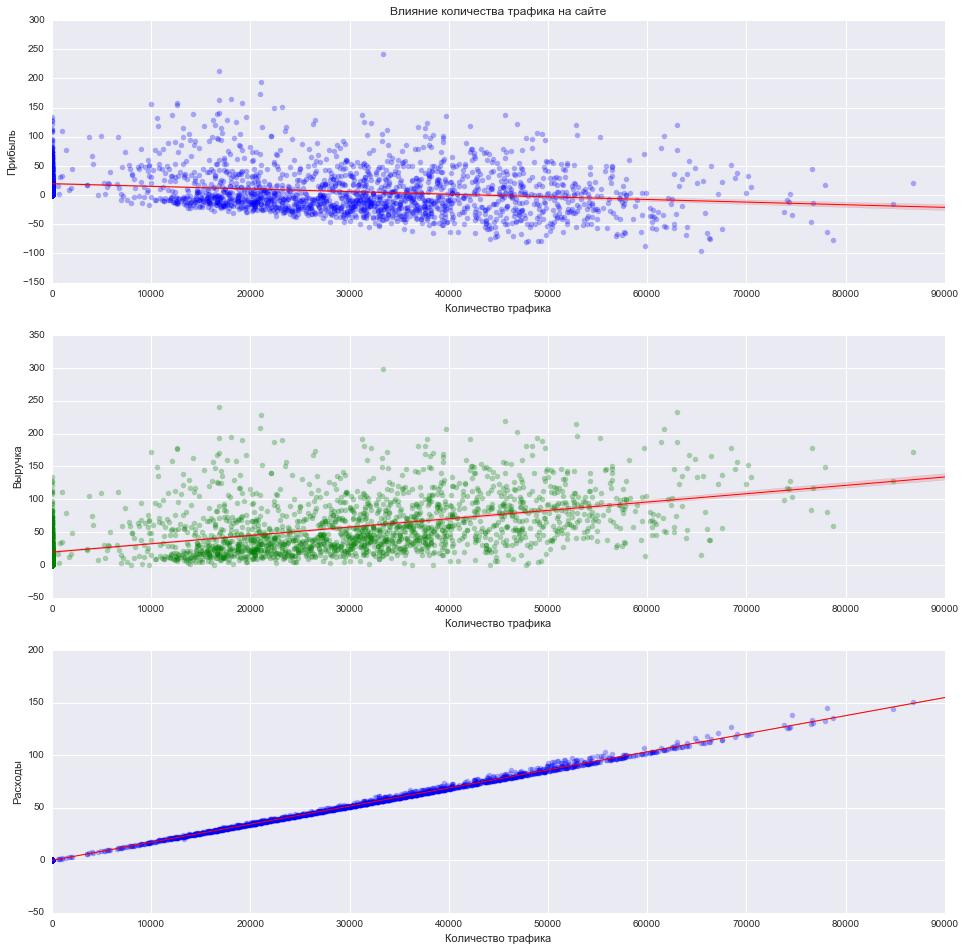

In [22]:
pylab.figure(figsize=(16, 16))

pylab.subplot(3,1,1)
plt.grid(True)
sns.regplot('Impressions', 'Profit', 
           data=dataFromSite, 
           fit_reg=True,
           ci = 95,
           line_kws={'color': 'red', "alpha":1,"lw":1},
           scatter_kws={"color":"blue","alpha":0.3,"s":30})
plt.xlabel(u'Количество трафика')
plt.ylabel(u'Прибыль')
plt.title(u'Влияние количества трафика на сайте')
plt.xlim(0, 90000)

pylab.subplot(3,1,2)
plt.grid(True)
sns.regplot('Impressions', 'Revenue', 
           data=dataFromSite, 
           fit_reg=True,
           ci = 95,
           line_kws={'color': 'red', "alpha":1,"lw":1},
           scatter_kws={"color":"green","alpha":0.3,"s":30})
plt.xlabel(u'Количество трафика')
plt.ylabel(u'Выручка')
plt.xlim(0, 90000)

pylab.subplot(3,1,3)
plt.grid(True)
sns.regplot('Impressions', 'Payed', 
           data=dataFromSite, 
           fit_reg=True,
           ci = 99,
           line_kws={'color': 'red', "alpha":1,"lw":1},
           scatter_kws={"color":"blue","alpha":0.3,"s":30})
plt.xlabel(u'Количество трафика')
plt.ylabel(u'Расходы')
plt.xlim(0, 90000)

## Оценка влияния количества трафика во время кампании на ключевые показатели 

In [23]:
X_Impressions = dataFromCampaign['Impressions']
y_Profit = dataFromCampaign[['Profit']]
y_Revenue = dataFromCampaign[['Revenue']]
y_Payed = dataFromCampaign[['Payed']]

In [24]:
X_Impressions = X_Impressions.reshape((len(X_Impressions), 1))

In [25]:
regr = LinearRegression()

regr.fit(X_Impressions, y_Profit)
ProfitCoef = regr.coef_[0][0]
ProfitIntercept = regr.intercept_[0]

regr.fit(X_Impressions, y_Revenue)
RevenueCoef = regr.coef_[0][0]
RevenueIntercept = regr.intercept_[0]

regr.fit(X_Impressions, y_Payed)
PayedCoef = regr.coef_[0][0]
PayedIntercept = regr.intercept_[0]

print ""
print 'Зависимость выгоды (Profit) от объема трафика (Impressions):'
print "Profit = {:} + {:}*Impressions".format(ProfitIntercept, ProfitCoef)
print "Объем трафика (Impressions) при нулевой выгоде (Profit) = {:}".format(round(ProfitIntercept/abs(ProfitCoef)))
print ""
print 'Зависимость выручки (Revenue) от объема трафика (Impressions):'
print "Revenue = {:} + {:}*Impressions".format(RevenueIntercept, RevenueCoef)
print ""
print 'Зависимость расходов (Payed) от объема трафика (Impressions)'
print "Payed = {:} + {:}*Impressions".format(PayedIntercept, PayedCoef)


Зависимость выгоды (Profit) от объема трафика (Impressions):
Profit = 4.06984341978 + -0.000455993074519*Impressions
Объем трафика (Impressions) при нулевой выгоде (Profit) = 8925.0

Зависимость выручки (Revenue) от объема трафика (Impressions):
Revenue = 4.38179202933 + 0.00126227976032*Impressions

Зависимость расходов (Payed) от объема трафика (Impressions)
Payed = 0.311953192416 + 0.00171827270674*Impressions


Построим соответсвующие графики:

(0, 90000)

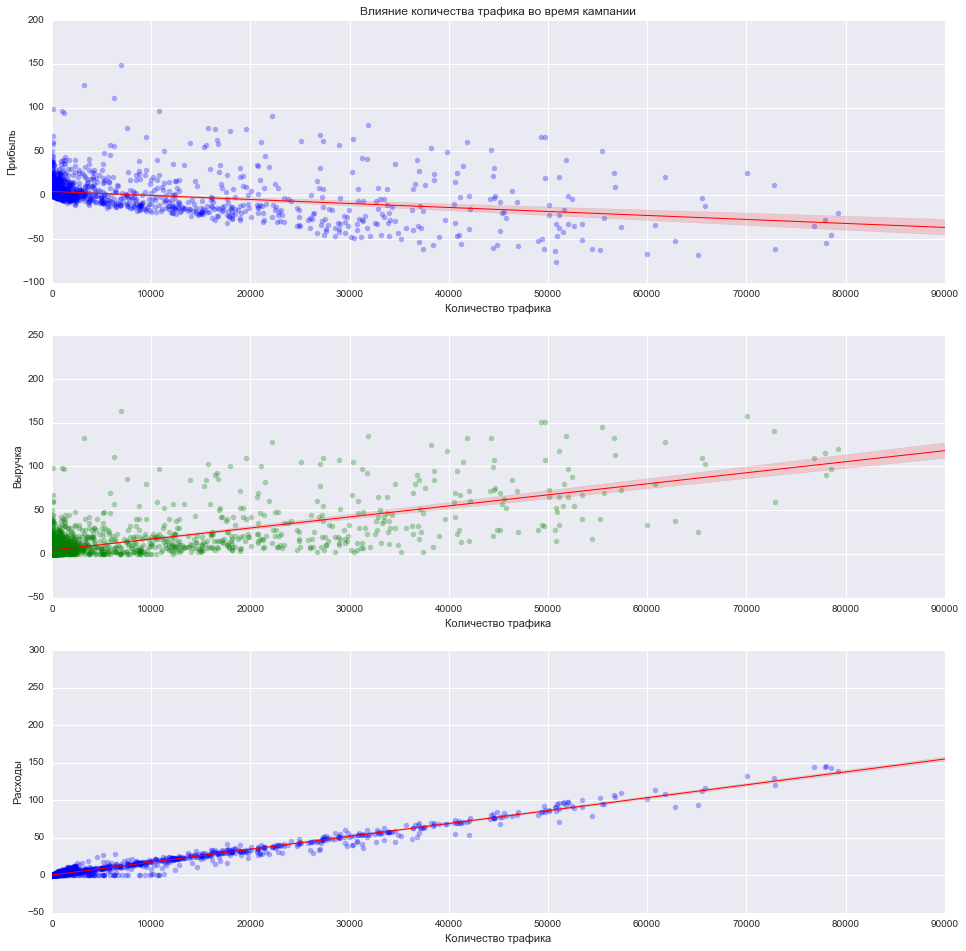

In [26]:
pylab.figure(figsize=(16, 16))

pylab.subplot(3,1,1)
plt.grid(True)
sns.regplot('Impressions', 'Profit', 
           data=dataFromCampaign, 
           fit_reg=True,
           ci = 95,
           line_kws={'color': 'red', "alpha":1,"lw":1},
           scatter_kws={"color":"blue","alpha":0.3,"s":30})
plt.xlabel(u'Количество трафика')
plt.ylabel(u'Прибыль')
plt.title(u'Влияние количества трафика во время кампании')
plt.xlim(0, 90000)

pylab.subplot(3,1,2)
plt.grid(True)
sns.regplot('Impressions', 'Revenue', 
           data=dataFromCampaign, 
           fit_reg=True,
           ci = 95,
           line_kws={'color': 'red', "alpha":1,"lw":1},
           scatter_kws={"color":"green","alpha":0.3,"s":30})
plt.xlabel(u'Количество трафика')
plt.ylabel(u'Выручка')
plt.xlim(0, 90000)

pylab.subplot(3,1,3)
plt.grid(True)
sns.regplot('Impressions', 'Payed', 
           data=dataFromCampaign, 
           fit_reg=True,
           ci = 99,
           line_kws={'color': 'red', "alpha":1,"lw":1},
           scatter_kws={"color":"blue","alpha":0.3,"s":30})
plt.xlabel(u'Количество трафика')
plt.ylabel(u'Расходы')
plt.xlim(0, 90000)

## Оценка влияния трафика с данного сайта в течении кампании на ключевые показатели

In [27]:
X_Impressions = dataFromSiteInCampaign['Impressions']
y_Profit = dataFromSiteInCampaign[['Profit']]
y_Revenue = dataFromSiteInCampaign[['Revenue']]
y_Payed = dataFromSiteInCampaign[['Payed']]

In [28]:
X_Impressions = X_Impressions.reshape((len(X_Impressions), 1))

In [29]:
regr = LinearRegression()

regr.fit(X_Impressions, y_Profit)
ProfitCoef = regr.coef_[0][0]
ProfitIntercept = regr.intercept_[0]

regr.fit(X_Impressions, y_Revenue)
RevenueCoef = regr.coef_[0][0]
RevenueIntercept = regr.intercept_[0]

regr.fit(X_Impressions, y_Payed)
PayedCoef = regr.coef_[0][0]
PayedIntercept = regr.intercept_[0]

print ""
print 'Зависимость выгоды (Profit) от объема трафика (Impressions):'
print "Profit = {:} + {:}*Impressions".format(ProfitIntercept, ProfitCoef)
print "Объем трафика (Impressions) при нулевой выгоде (Profit) = {:}".format(round(ProfitIntercept/abs(ProfitCoef)))
print ""
print 'Зависимость выручки (Revenue) от объема трафика (Impressions):'
print "Revenue = {:} + {:}*Impressions".format(RevenueIntercept, RevenueCoef)
print ""
print 'Зависимость расходов (Payed) от объема трафика (Impressions)'
print "Payed = {:} + {:}*Impressions".format(PayedIntercept, PayedCoef)


Зависимость выгоды (Profit) от объема трафика (Impressions):
Profit = 6.7854086388 + -0.00055913380087*Impressions
Объем трафика (Impressions) при нулевой выгоде (Profit) = 12136.0

Зависимость выручки (Revenue) от объема трафика (Impressions):
Revenue = 6.74034870005 + 0.00118187844418*Impressions

Зависимость расходов (Payed) от объема трафика (Impressions)
Payed = -0.0450685964055 + 0.00174101250355*Impressions


Построим соответсвующие графики:

(0, 90000)

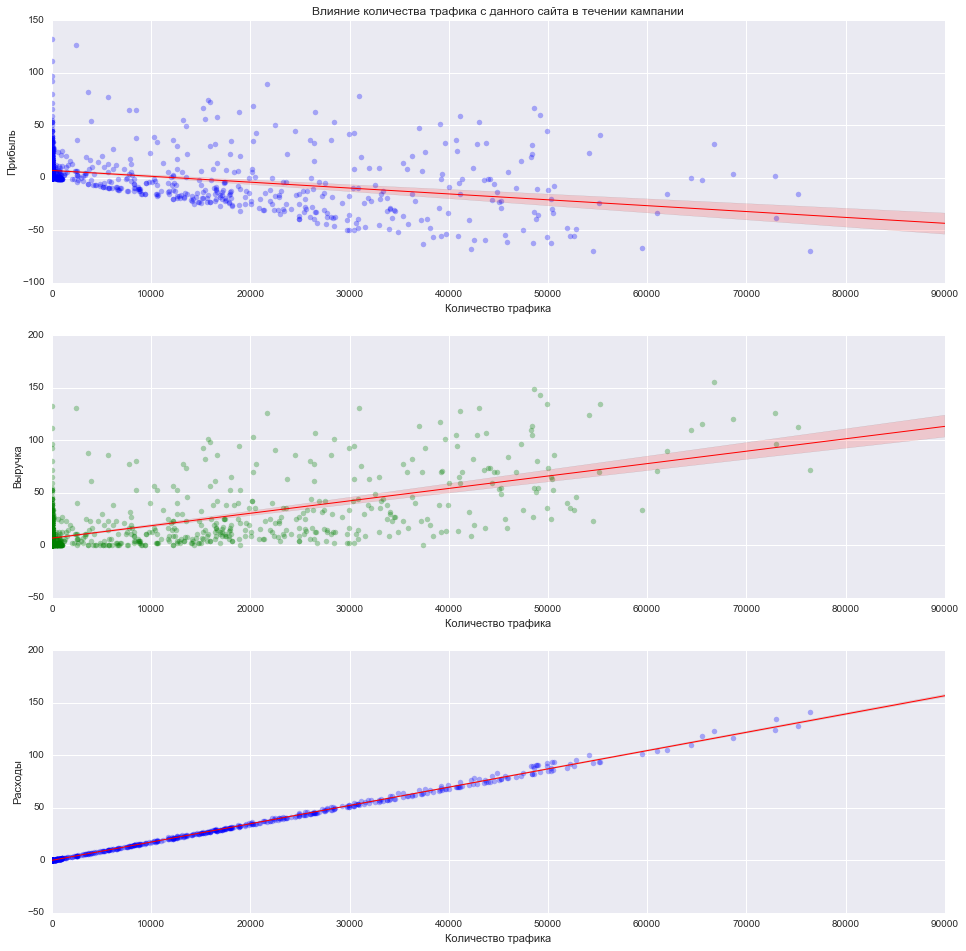

In [30]:
pylab.figure(figsize=(16, 16))

pylab.subplot(3,1,1)
plt.grid(True)
sns.regplot('Impressions', 'Profit', 
           data=dataFromSiteInCampaign, 
           fit_reg=True,
           ci = 95,
           line_kws={'color': 'red', "alpha":1,"lw":1},
           scatter_kws={"color":"blue","alpha":0.3,"s":30})
plt.xlabel(u'Количество трафика')
plt.ylabel(u'Прибыль')
plt.title(u'Влияние количества трафика с данного сайта в течении кампании')
plt.xlim(0, 90000)

pylab.subplot(3,1,2)
plt.grid(True)
sns.regplot('Impressions', 'Revenue', 
           data=dataFromSiteInCampaign, 
           fit_reg=True,
           ci = 95,
           line_kws={'color': 'red', "alpha":1,"lw":1},
           scatter_kws={"color":"green","alpha":0.3,"s":30})
plt.xlabel(u'Количество трафика')
plt.ylabel(u'Выручка')
plt.xlim(0, 90000)

pylab.subplot(3,1,3)
plt.grid(True)
sns.regplot('Impressions', 'Payed', 
           data=dataFromSiteInCampaign, 
           fit_reg=True,
           ci = 99,
           line_kws={'color': 'red', "alpha":1,"lw":1},
           scatter_kws={"color":"blue","alpha":0.3,"s":30})
plt.xlabel(u'Количество трафика')
plt.ylabel(u'Расходы')
plt.xlim(0, 90000)

# Общие выводы и рекомендации

1) Трафик (сайт, кампания и сайт в ходе кампании) приносит прибыль, в основном, во второй половине дня (в период с 12.00 до 00.00). Исключение пятница - в период с 18.00 до 00.00.     
2) В праздничные дни трафик (сайт, кампания и сайт в ходе кампании) прибыли не приносит.    
3) Рекомендуемый объем трафика:    
* Сайт: 
Зависимость выгоды (Profit) от объема трафика (Impressions): Profit = 19.4958664658 - 0.000451094832789*Impressions     
Объем трафика (Impressions) должен не превышать 43219, иначе Profit будет меньше 0.    
* Кампания:   
Зависимость выгоды (Profit) от объема трафика (Impressions): Profit = 4.06984341978 - 0.000455993074519*Impressions   
Объем трафика (Impressions) должен не превышать 8925, иначе Profit будет меньше 0.    
* Вклад сайта в кампанию:   
Зависимость выгоды (Profit) от объема трафика (Impressions): Profit = 6.7854086388 - 0.00055913380087*Impressions    
Объем трафика (Impressions) должен не превышать 12136, иначе Profit будет меньше 0.   

4) Оценки для выручки (Revenue) и расходов (Payed) см. выше.

